# TTK7 Assignment 1: Analysis of a brainwave signal
> Authored by Sondre Tveiten and Hans G. L. Grayston

Main takeaway: The methods of analysis is limited due to the lack of IMF decomposition.


### Load the timeseries as a Pandas Dataframe type object

In [1]:
import pandas as pd
import numpy as np
from src.signal_analyzer import SignalAnalyzer

df = pd.read_csv('signals/Signal3_2018.csv', header=None)
signal = df.iloc[0].values


## 

## Which analyses did we opt for?

The Hilbert transformed proved to be uninformative for this signal, as there are several modes in the mix. HT expects a single-mode input only, so we gain nothing on calculating it. Otherwise, we opted for FFT, STFT, WVT and Wavelet Transform.

Additionally, a useful prior knowledge before analysing would be to deduce whether or not the signal is complex, as it could contain information in the negative frequencies.

In [8]:
# Test: is the signal complex?
print(np.iscomplexobj(signal))

False


> Since we have no imaginary components for the original signal explicitly in the dataframe, nor any sensible result from the Hilbert Transform, we can omit negative frequencies from the methods.

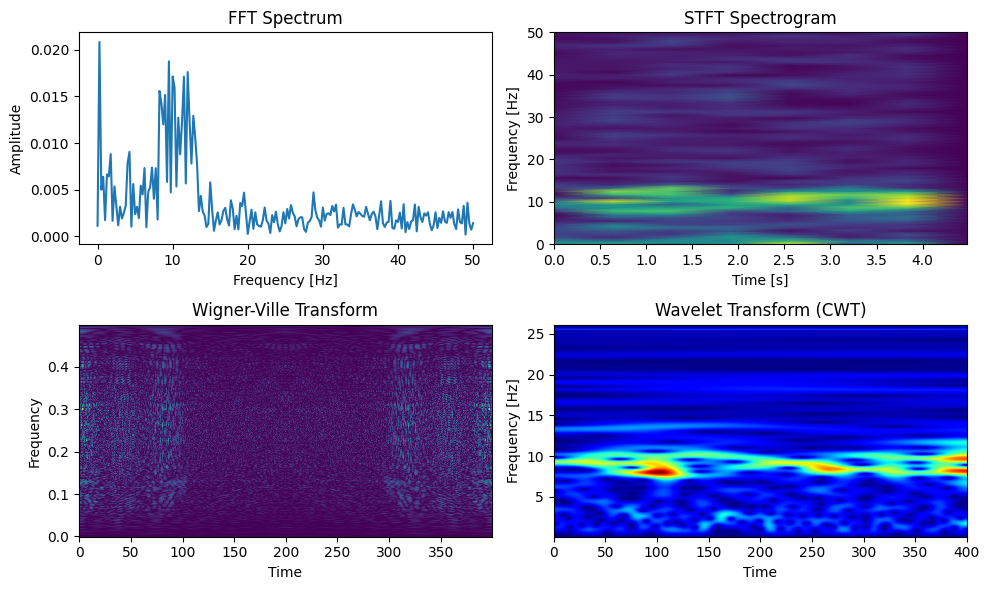

In [9]:
# ht   = SignalAnalyzer.hilbert_transform(signal, fs=100.0, n_bins=256)
analyzer = SignalAnalyzer()


fft = analyzer.fft_transform(signal, fs=100.0)
stft = analyzer.stft_transform(signal, fs=100.0, nperseg=128)
wvt = analyzer.wvt_transform(signal)
cwt = analyzer.wt_transform(signal,wavelet='morlet', fs=100.0)

results = [
    fft,
    stft,
    wvt,
    cwt
]


plot_analytical_signal = True
width = 10
height = 6
if plot_analytical_signal:
    analyzer.plot_all(signal, results, width, height)




### What do the plots tell us about the signal's stationarity?

> Given the time-varying property of the frequency magnitudes, we can conclude that the signal is non-stationary.

## Does the signal still produce the same signature even after a Gaussian component is added to the modes?

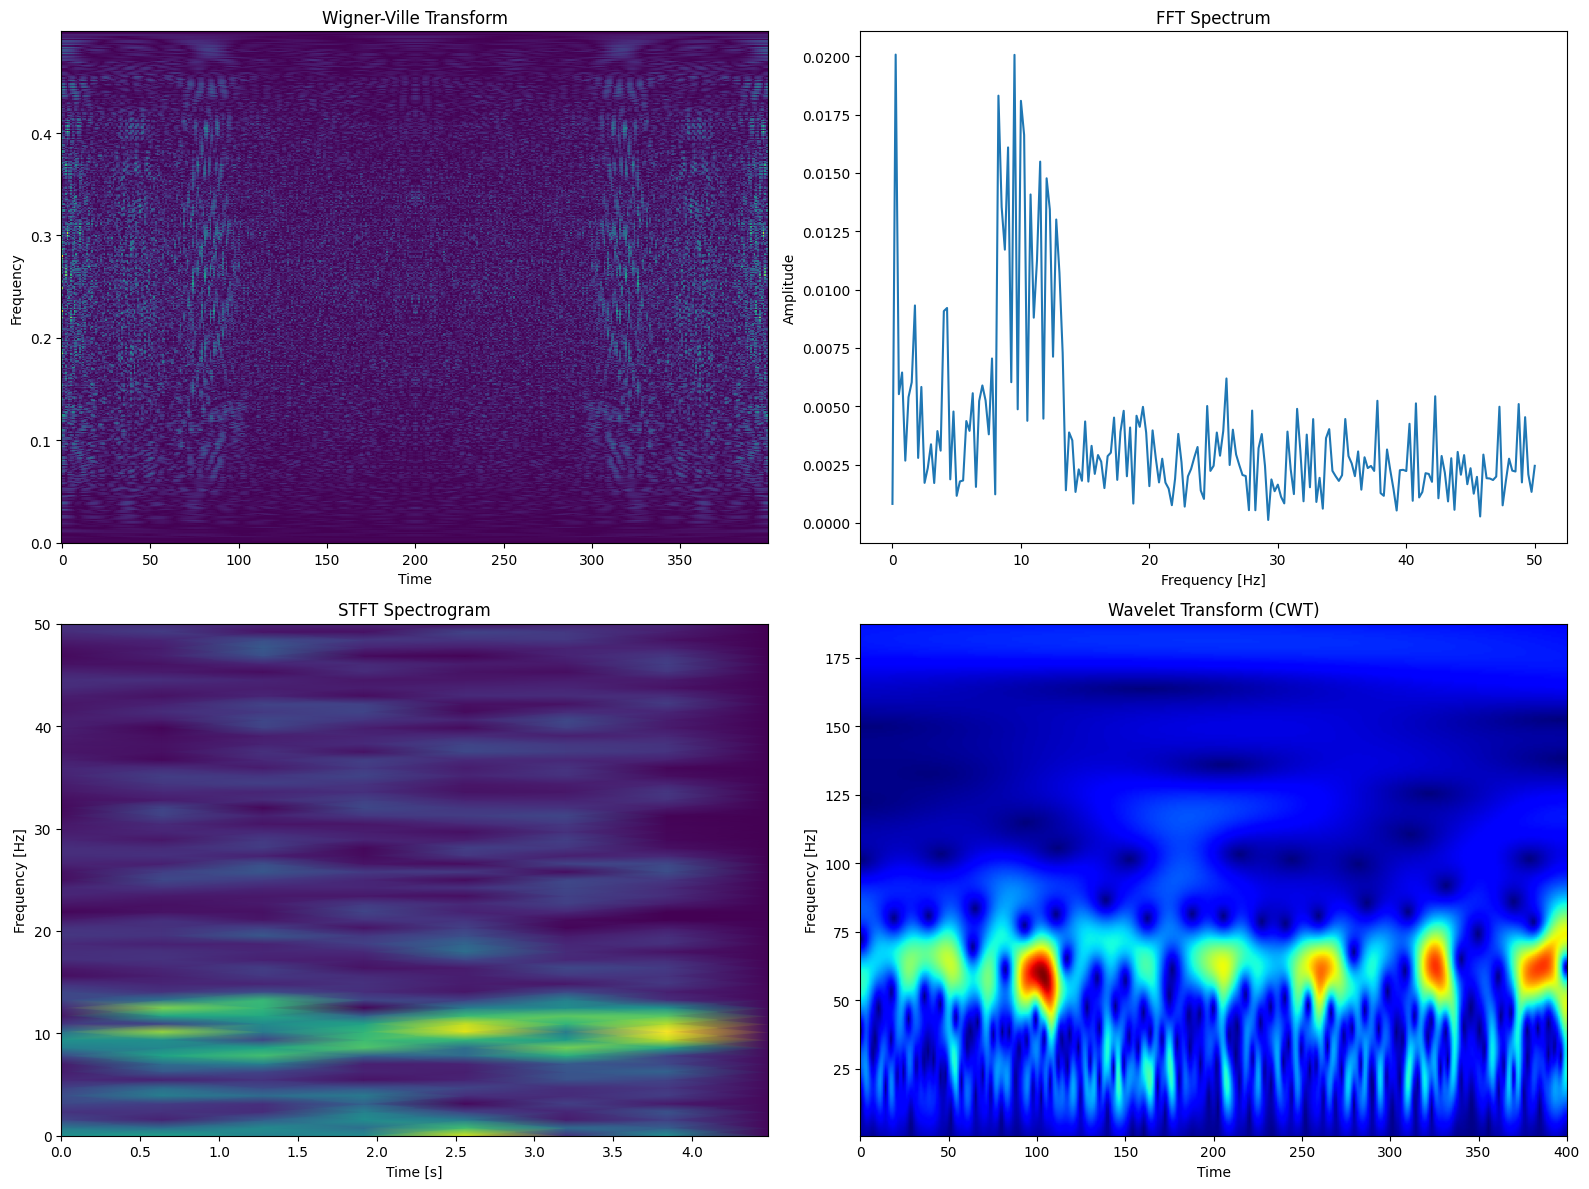

In [4]:
# Add white noise
noise = np.random.normal(0,signal.max()/10,len(signal))
noisy_signal = signal + noise

# ht_noisy   = analyzer.hilbert_transform(noisy_signal, fs=100.0, n_bins=64)
wvt_noisy  = analyzer.wvt_transform(noisy_signal)
fft_noisy  = analyzer.fft_transform(noisy_signal, fs=100.0)
stft_noisy = analyzer.stft_transform(noisy_signal, fs=100.0, nperseg=128)
cwt_noisy  = analyzer.wt_transform(noisy_signal, wavelet='cmhat', fs=100.0)
results_noisy = [
    # ht_noisy,
    wvt_noisy,
    fft_noisy,
    stft_noisy,
    cwt_noisy
]
analyzer.plot_all(noisy_signal, results_noisy, width=16, height=12)


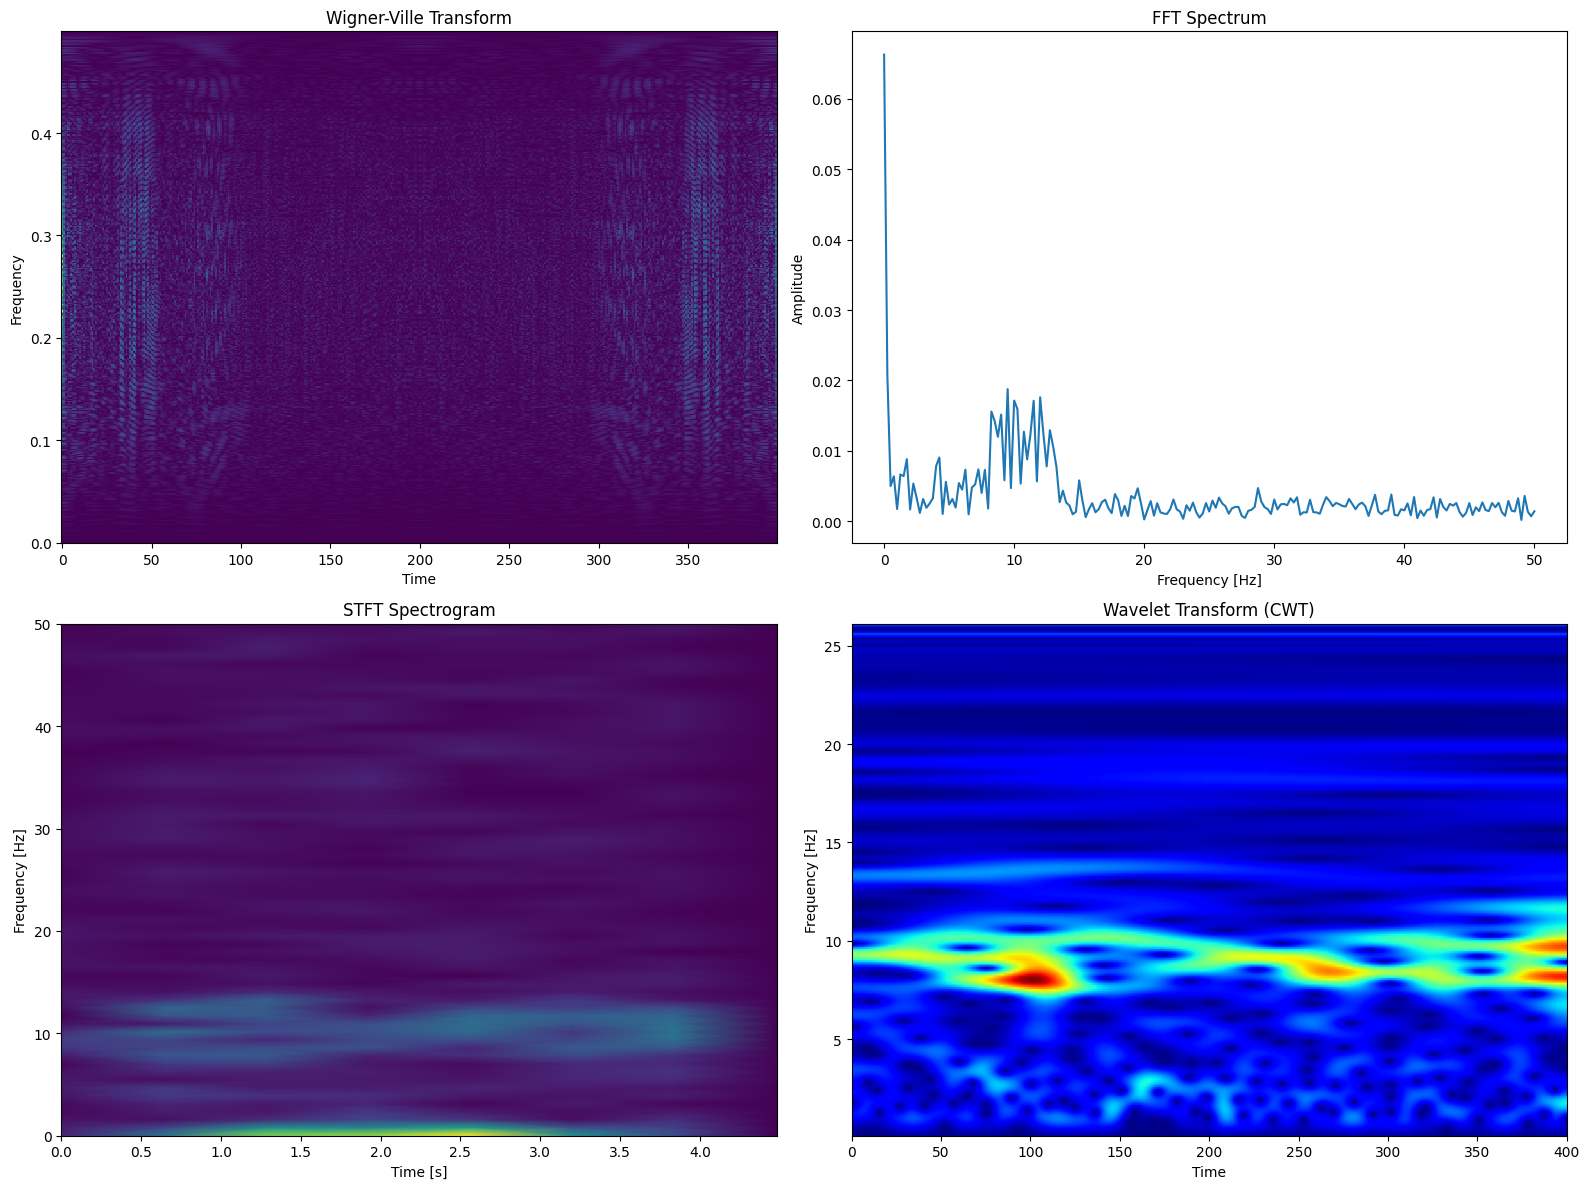

In [5]:
# add offset
offset_signal = signal.max()/5 + signal

# ht_offset   = analyzer.hilbert_transform(offset_signal, fs=100.0, n_bins=256)
wvt_offset  = analyzer.wvt_transform(offset_signal)
fft_offset  = analyzer.fft_transform(offset_signal, fs=100.0)
stft_offset = analyzer.stft_transform(offset_signal, fs=100.0, nperseg=128)
cwt_offset  = analyzer.wt_transform(offset_signal, wavelet='morlet', fs=100.0)
results_offset = [
    # ht_offset,
    wvt_offset,
    fft_offset,
    stft_offset,
    cwt_offset
]
analyzer.plot_all(offset_signal, results_offset, width=16, height=12, spectrum=False)

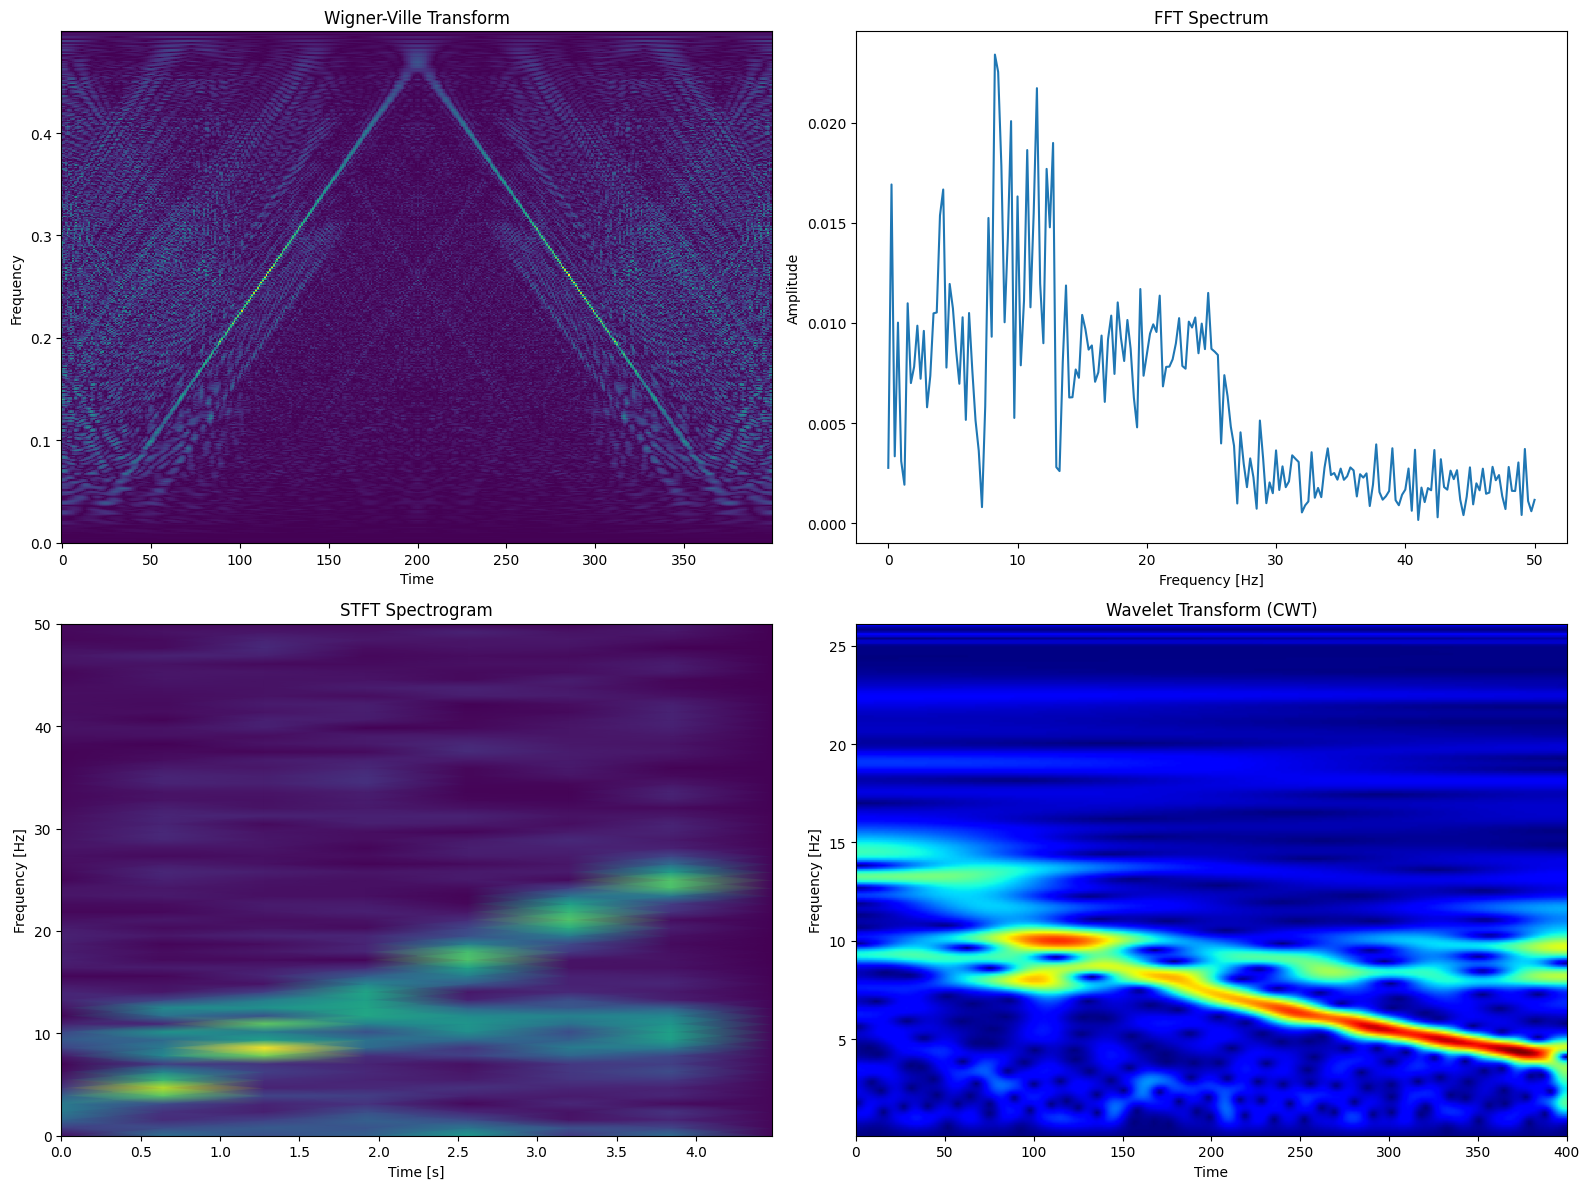

In [6]:
## Add a linearly time variying frquency component
n_chirp = len(signal)
t = np.linspace(0, 1, n_chirp)
k = 50 

amplitude = signal.max()
chirp = amplitude/2 * np.sin(2 * np.pi * (5 * t + k * t**2)) 

signal_kt = signal + chirp
# ht_kt   = analyzer.hilbert_transform(signal_kt, fs=100.0, n_bins=256)
wvt_kt  = analyzer.wvt_transform(signal_kt)
fft_kt  = analyzer.fft_transform(signal_kt, fs=100.0)
stft_kt = analyzer.stft_transform(signal_kt, fs=100.0, nperseg=128)
cwt_kt  = analyzer.wt_transform(signal_kt, wavelet='morlet', fs=100.0)

results_kt = [
    # ht_kt,
    wvt_kt,
    fft_kt,
    stft_kt,
    cwt_kt
]
analyzer.plot_all(signal_kt, results_kt, width=16, height=12, spectrum=False)

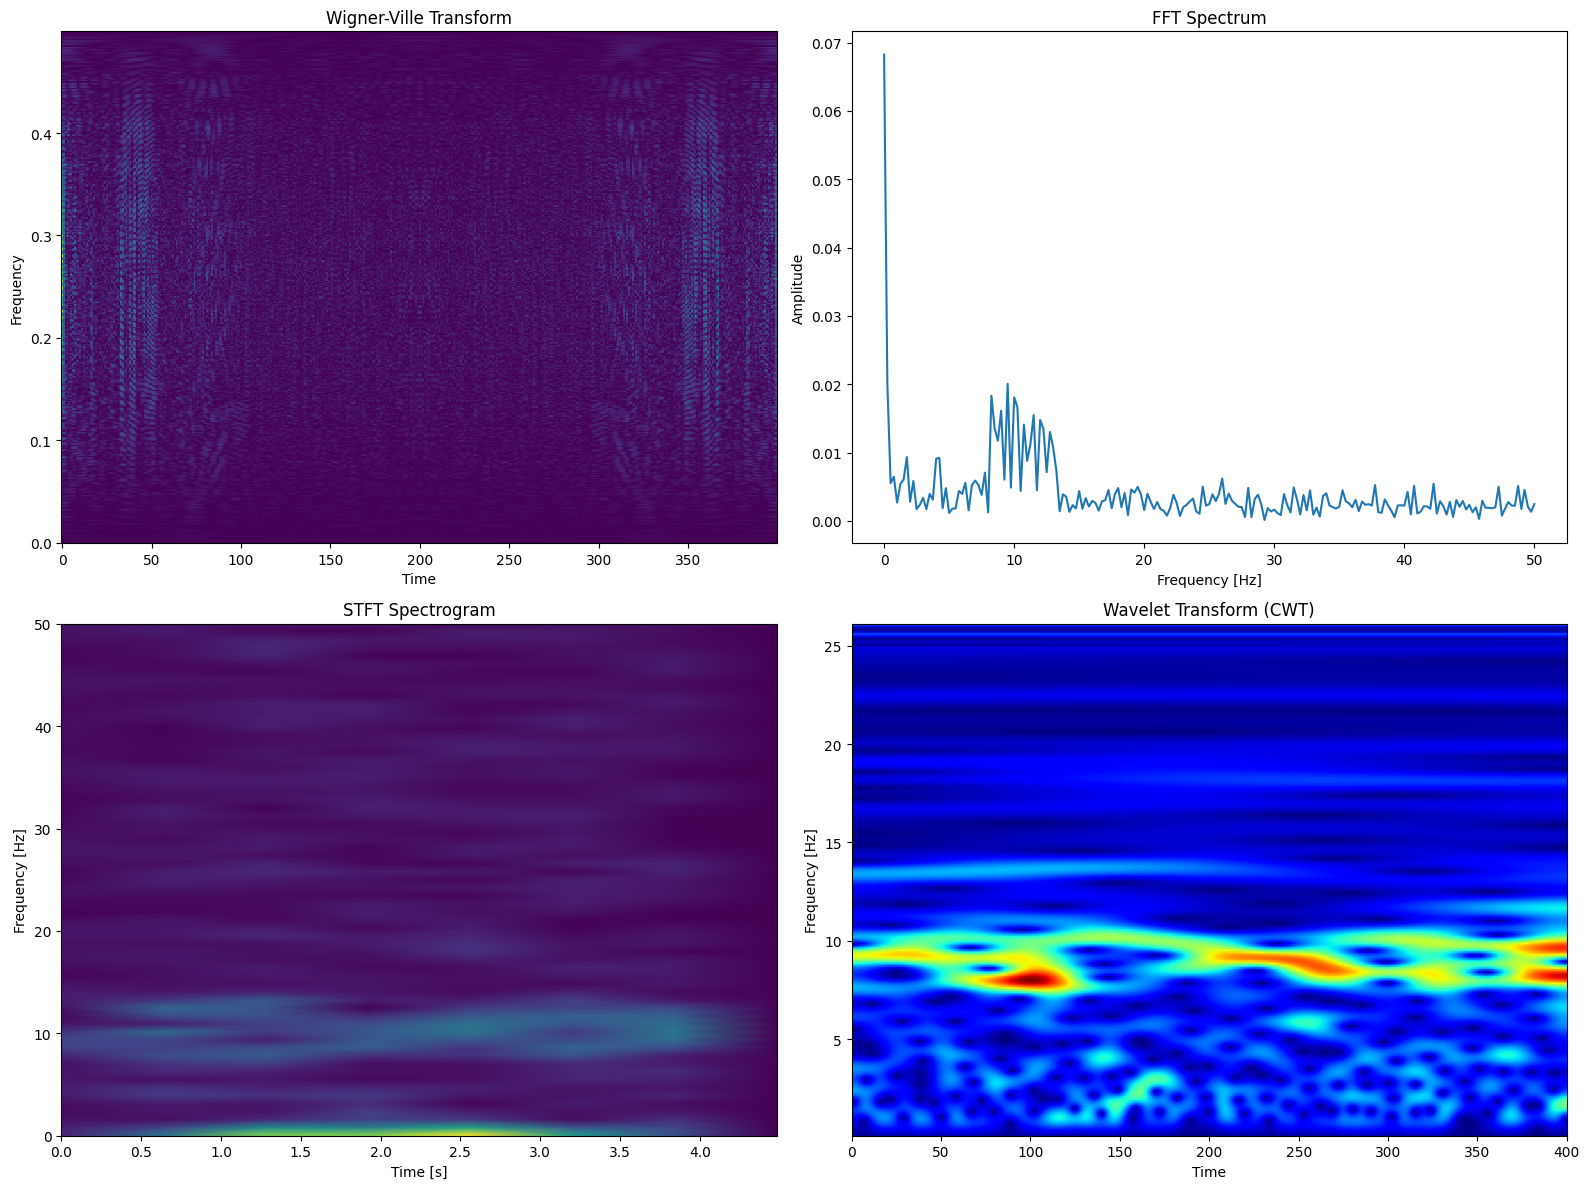

In [7]:
# offset + noise
noisy_offset_signal = offset_signal + noise
# ht_noisy_offset   = analyzer.hilbert_transform(noisy_offset_signal, fs=100.0, n_bins=128)
wvt_noisy_offset  = analyzer.wvt_transform(noisy_offset_signal)
fft_noisy_offset  = analyzer.fft_transform(noisy_offset_signal, fs=100.0)
stft_noisy_offset = analyzer.stft_transform(noisy_offset_signal, fs=100.0, nperseg=128)
cwt_noisy_offset  = analyzer.wt_transform(noisy_offset_signal, wavelet='morlet', fs=100.0)
results_noisy_offset = [
    # ht_noisy_offset,
    wvt_noisy_offset,
    fft_noisy_offset,
    stft_noisy_offset,
    cwt_noisy_offset
]
analyzer.plot_all(noisy_offset_signal, results_noisy_offset, width=16, height=12)